# Theoretical Questions

* This is the theoretical part of the final project. It includes theoretical questions from various topics covered in the course.
* There are 7 questions among which you need to choose 6, according to the following key:
    + Question 1 is **mandatory**.
    + Choose **one question** from questions 2-3.
    + Question 4 is **mandatory**.
    + Questions 5-6 are **mandatory**.
    + Question 7 is **mandatory**.
* Question 1 is worth 15 points, whereas the other questions worth 7 points.
* All in all, the maximal grade for this parts is 15+7*5=50 points.
* **You should answer the questions on your own. We will check for plagiarism.**
* If you need to add external images (such as graphs) to this notebook, please put them inside the 'imgs' folder. DO NOT put a reference to an external link.
* Good luck!

## Part 1: General understanding of the course material

### Question 1

1.  Relate the number of parameters in a neural network to the over-fitting phenomenon (*).
    Relate this to the design of convolutional neural networks, and explain why CNNs are a plausible choice for an hypothesis class for visual classification tasks.

    (*) In the context of classical under-fitting/over-fitting in machine learning models.

--------------------------------------------------------------------------------------------
#### **Answer:**

In machine learning, the complexity of a model is often tied to the number of parameters it has. More parameters can make a model more flexible, but this flexibility can be a double-edged sword. On one hand, a complex model can fit the training data really well, capturing intricate patterns. On the other hand, it can also overfit, meaning it learns the noise in the data rather than the actual trend. Overfitting is bad because the model won't generalize well to new, unseen data.

When it comes to neural networks, Fully Connected Networks are the traditional type, and they have a lot of parameters. That's because every neuron in one layer connects to every neuron in the next layer. This makes FCNs prone to overfitting, especially when dealing with complex data like images.

**Convolutional Neural Networks** offer a smarter approach, particularly for image data. They manage to reduce the number of parameters through several techniques:

- Parameter Sharing: Unlike Fully Connected Networks (FCNs), where each neuron in one layer is connected to every neuron in the next layer, CNNs use the same filter across different parts of the input. This reduces the number of parameters, making CNNs less prone to overfitting.

- Local Connectivity: In CNNs, each neuron is only connected to a small region of the input, known as the receptive field. This is based on the principle that pixels in an image have strong local correlations. This again reduces the number of parameters and captures the local features effectively.

- Hierarchical Feature Learning: CNNs are designed to automatically and adaptively learn spatial hierarchies of features. The early layers might detect edges, the middle layers may detect shapes by combining edges, and the deeper layers may detect more complex structures. Each layer adds a level of abstraction and reduces dimensionality, making the model more generalizable.

- Spatial Reduction: Through pooling layers, CNNs reduce the spatial dimensions (width & height) of the input volume. This not only reduces the computational complexity but also makes the detection of certain features invariant to scale and orientation changes.


**Why CNNs for Visual Classification:**

- Efficiency: Due to parameter sharing and local connectivity, CNNs are more computationally efficient than FCNs, allowing them to handle high-resolution images without an explosion in the number of parameters.

- Robustness: The hierarchical feature learning and translation invariance make CNNs robust to variations in object appearance, making them ideal for visual classification.

- Generalization: The reduced number of parameters and the ability to learn hierarchical features make CNNs less prone to overfitting, especially when the amount of training data is limited.

CNNs strike a balance between complexity and generalization, making them a solid choice for image classification tasks. They manage to capture the important features in images while ignoring the noise, which is crucial for tasks that require visual understanding.

--------------------------------------------------------------------------------------------

2. Consider the linear classifier model with hand-crafted features: 
    $$f_{w,b}(x) = w^T \psi(x) + b$$
    where $x \in \mathbb{R}^2$, $\psi$ is a non-learnable feature extractor and assume that the classification is done by $sign(f_{w,b}(x))$. Let $\psi$ be the following feature extractor $\psi(x)=x^TQx$ where $Q \in \mathbb{R}^{2 \times 2}$ is a non-learnable positive definite matrix. Describe a distribution of the data which the model is able to approximate, but the simple linear model fails to approximate (hint: first, try to describe the decision boundary of the above classifier).

--------------------------------------------------------------------------------------------
#### **Answer:**

The classification decision is made based on $sign(f_{w,b}(x))$, and the decision boundary is defined where $f_{w,b}(x)=0$.

Substituting the given $f_{w,b}(x)$ into this equation, we get:

$$0 = w^Tψ(x) + b = w^TxQx^T + b$$

This equation represents a quadratic decision boundary in the form of a conic section, which could be an ellipse, hyperbola, or parabola depending on the specific values of $w$ and $Q$.

Now, let's consider the type of data distribution that this model can approximate but a simple linear model cannot. A simple linear model has a decision boundary of the form $w^T$$x$$+b$$=0$, which is a straight line in $\mathbb{R}^2$. Such a model is incapable of approximating data distributions that are not linearly separable.

In contrast, our model with a quadratic decision boundary can approximate data distributions that are separable by a conic section. Mathematically, this means that the data distribution $D$ would satisfy a condition like:

$$D = \{x \in \mathbb{R}^2 : ax_1^2+bx_1x_2+cx_2^2+dx_1+ex_2+f\geq0\}$$

where $a,b,c,d,e$ and $f$ are constants that define the conic section.

To illustrate, consider a data distribution where points lie along an ellipse $x^2 +4y^2 = 1$ and are labeled as class $1$, while points along a smaller ellipse $x^2 + 4y^2 = 0.5$ are labeled as class $-1$. A simple linear classifier would struggle to classify these points correctly. However, a model with an elliptical decision boundary could do so effectively.

In summary, this model is capable of approximating data distributions that are separable by a conic section, which includes quadratic forms like ellipses, hyperbolas, and parabolas. This is a significant advantage over simple linear models, which can only approximate data that is linearly separable.

--------------------------------------------------------------------------------------------

3. Assume that we would like to train a Neural Network for classifying images into $C$ classes. Assume that the architecture can be stored in the memory as a computational graph with $N$ nodes where the output is the logits (namely, before applying softmax) for the current batch ($f_w: B \times Ch \times H \times W \rightarrow B \times C$). Assume that the computational graph operates on *tensor* values.
    * Implement the CE loss assuming that the labels $y$ are hard labels given in a LongTensor of shape $B \times 1$. **Use Torch's log_softmax and gather functions** and implement with less as possible operations.

In [1]:
from torch.nn.functional import log_softmax
from torch import gather

def compute_cross_entropy(logits, labels):
    '''
    Input: logits, labels = model(x), y
    Output: loss = compute_cross_entropy(logits, labels)
    '''
    log_probs = log_softmax(logits, dim=1)
    selected_log_probs = gather(log_probs, 1, labels.view(-1, 1))
    return (-selected_log_probs).mean()

* Using the model's function as a black box, draw the computational graph (treating both log_softmax and gather as an atomic operations). How many nodes are there in the computational graph?

--------------------------------------------------------------------------------------------
#### **Answer:**

In the context of neural networks, a computational graph serves as a blueprint for the sequence of operations that the model performs. This blueprint consists of 5 main "stations" or nodes (and overall 8 nodes if we count the 2 input nodes (logits and labels) and onutput node (CE loss)).

- log_softmax: Converts the raw logits into log probabilities. This makes the output more interpretable and numerically stable for further calculations.

- gather: Selects the log probabilities corresponding to the true labels. This is essential for calculating the Cross-Entropy loss, which measures how well the predicted probabilities align with the true labels.

- Negation: Negates the selected log probabilities, as per the Cross-Entropy formula.

- Summation: Sums up the negated log probabilities.

- Division: Divides the sum by the batch size $N$ to get the mean, which is the final Cross-Entropy loss.

The computational graph is plotted below:

![graph](imgs/deep_q1_3_1.png)

--------------------------------------------------------------------------------------------

* Now, instead of using hard labels, assume that the labels are representing some probability distribution over the $C$ classes. How would the gradient computation be affected? analyze the growth in the computational graph, memory and computation.

--------------------------------------------------------------------------------------------
#### **Answer:**

When using probability distribution labels instead of hard labels, the computational graph would undergo changes. Specifically, the gather operation that selects the log probabilities corresponding to the true labels would be replaced by a KL-divergence operation to compare the model's output distribution with the "golden distribution" represented by the labels. This change would not significantly affect memory usage but would increase computational complexity, as KL-divergence involves more calculations than simple gathering.

The gradient computation would also become more nuanced. Instead of a straightforward backpropagation based on hard labels, the gradients would now be influenced by the entire distribution, making the optimization process more complex. This could potentially lead to a more robust model that accounts for uncertainties in the labels, but at the cost of increased computational resources.

--------------------------------------------------------------------------------------------

* Apply the same analysis in the case that we would like to double the batch size. How should we change the learning rate of the optimizer?

--------------------------------------------------------------------------------------------
#### **Answer:**

Doubling the batch size won't change the structure of the computational graph, as each node still performs the same operation but on a larger dataset. This will, however, increase the memory requirements to accommodate the larger batch.

In terms of adjusting the learning rate, a common guideline when using Stochastic Gradient Descent (SGD) is to scale the learning rate in proportion to the batch size. For instance, if you double the batch size, you might also double the learning rate. This aims to keep the contribution of each sample's gradient to the overall gradient consistent, preserving the optimization dynamics.

However, this is not a one-size-fits-all rule. If you're using an optimizer like Adam, you might consider a more nuanced adjustment, such as scaling the learning rate by the square root of the batch size. Regardless of the optimizer, it's crucial to empirically validate any changes to the learning rate for the specific model and dataset.

--------------------------------------------------------------------------------------------

## Part 2: Optimization & Automatic Differentiation

### Question 2: resolving gradient conflicts in multi-task learning

Assume that you want to train a model to perform two tasks: task 1 and task 2. 
For each such task $i$ you have an already implemented function *loss\_i = forward_and_compute_loss_i(model,inputs)* such that given the model and the inputs it computes the loss w.r.t task $i$ (assume that the computational graph is properly constructed). We would like to train our model using SGD to succeed in both tasks as follows: in each training iteration (batch) -
* Let $g_i$ be the gradient w.r.t the $i$-th task.
* If $g_1 \cdot g_2 < 0$:
    + Pick a task $i$ at random.
    + Apply GD w.r.t only that task.
* Otherwise:
    + Apply GD w.r.t both tasks (namely $\mathcal{L}_1 + \mathcal{L}_2$).

Note that in the above formulation the gradient is a thought of as a concatination of all the gradient w.r.t all the models parameters, and $g_1 \cdot g_2$ stands for a dot product.

What parts should be modified to implement the above? Is it the optimizer, the training loop or both? Implement the above algorithm in a code cell/s below

### **Answer:**

The algorithm in question aims to make a decision on which task-specific loss function to optimize, based on the dot product of the gradients $g_1$​ and $g_2​$ corresponding to the two tasks. The dot product can be described as:
$$g_1 \cdot g_2 = \norm{g_1} \cdot \norm{g_2} \cdot cos⁡(\theta)$$

Here, $\norm{g_1}$ and $\norm{g_2}$ are the norms of the gradients, and $\theta$ is the angle between them. Since the norms are always non-negative, the sign of the dot product is determined solely by the value of $cos⁡(\theta)$.

*Decision Criteria:*

- If $cos⁡(\theta)$ is positive (i.e., $\theta < 90 \degree$), it implies that the gradients are pointing in similar directions. In this case, optimizing for both tasks is beneficial.
- If $cos⁡(\theta)$ is negative (i.e., $\theta > 90 \degree$), the gradients are pointing in diverging directions. In this scenario, optimizing for both could lead to a conflicting update. Hence, a random task is chosen for optimization.

*Why Only Modify the Training Loop?*

The core of this algorithm lies in deciding which loss function(s) to backpropagate during each optimization step. This decision is made in the training loop after the forward passes and loss computations for both tasks. No special modifications are needed for the optimizer itself, which remains a standard implementation of Gradient Descent (GD).

*Why Not Modify the Optimizer?*

The optimizer's role is to adjust the model parameters based on the gradients it receives. In this algorithm, the choice of which gradients to use is made beforehand, in the training loop. Therefore, modifying the optimizer would be redundant and unnecessary. The optimizer simply performs its role based on whichever gradient is passed to it after the decision-making process in the training loop.

By focusing solely on the training loop for modifications, the algorithm achieves its objective of selective multi-task optimization without requiring changes to the underlying optimization algorithm (GD in this case).

#### **Implementation:**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Initialize the model and the optimizer
model = Model()
optimizer = optim.SGD(model.parameters())

# Training loop with GD
for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    # Compute the gradients for Task 1
    loss1 = forward_and_compute_loss_1(model, inputs1, targets1)
    loss1.backward()
    grads1 = torch.cat([p.grad.data.view(-1) for p in model.parameters()])
    optimizer.zero_grad()
    
    # Compute the gradients for Task 2
    loss2 = forward_and_compute_loss_2(model, inputs2, targets2)
    loss2.backward()
    grads2 = torch.cat([p.grad.data.view(-1) for p in model.parameters()])
    
    # Decide which loss to use based on the dot product of gradients
    dot_product = torch.dot(grads1, grads2)
    if dot_product >= 0:
        loss = loss1 + loss2
    else:
        loss = loss1 if random.choice([True, False]) else loss2
    
    # Optimize the chosen loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


#### **Example:** (output plot already given - no need to re-run)

Epoch [1/200], Loss1: 378.5098, Loss2: 1302.8988, Combined Loss: 1681.4086
Epoch [21/200], Loss1: 108.4000, Loss2: 728.0474, Combined Loss: 836.4474
Epoch [41/200], Loss1: 70.8495, Loss2: 514.7315, Combined Loss: 585.5810
Epoch [61/200], Loss1: 86.1678, Loss2: 463.3067, Combined Loss: 86.1678
Epoch [81/200], Loss1: 100.0207, Loss2: 433.4662, Combined Loss: 100.0207
Epoch [101/200], Loss1: 116.1251, Loss2: 408.6750, Combined Loss: 116.1251
Epoch [121/200], Loss1: 107.7352, Loss2: 388.0303, Combined Loss: 495.7655
Epoch [141/200], Loss1: 128.9424, Loss2: 382.2550, Combined Loss: 128.9424
Epoch [161/200], Loss1: 34.7764, Loss2: 282.2366, Combined Loss: 317.0130
Epoch [181/200], Loss1: 58.7040, Loss2: 257.7454, Combined Loss: 316.4494


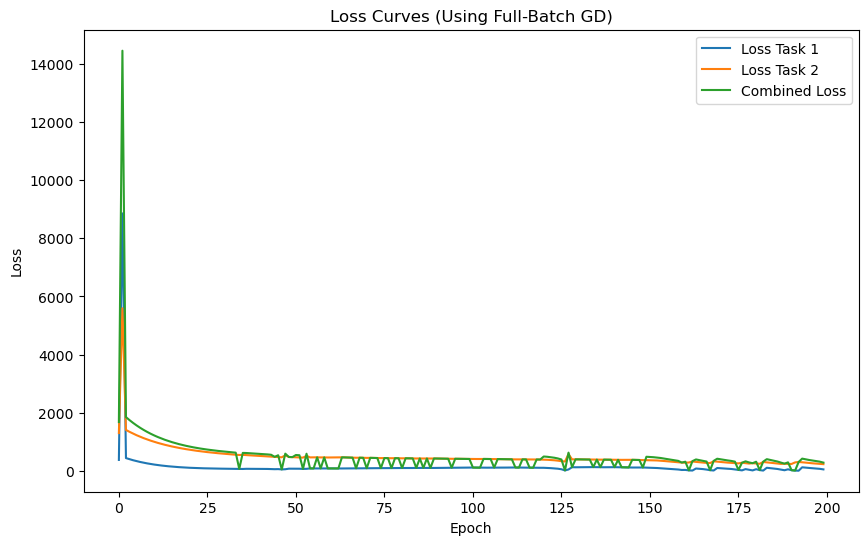

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import random

# Define SimpleNN model
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x

# Define dummy loss functions for Task 1 and Task 2
def forward_and_compute_loss_1(model, inputs, targets):
    outputs = model(inputs)
    loss = nn.MSELoss()(outputs, targets)
    return loss

def forward_and_compute_loss_2(model, inputs, targets):
    outputs = model(inputs)
    loss = nn.MSELoss()(outputs, targets)
    return loss

# Generate synthetic data for Task 1 and Task 2
X1 = torch.rand(100, 1) * 10  # 100 samples, 1 feature
y1 = 3 * X1 + 2 + torch.randn(100, 1)  # Linear relation with some noise
X2 = torch.rand(100, 1) * 10  # 100 samples, 1 feature
y2 = 7 * X2 - 4 + torch.randn(100, 1)  # Linear relation with some noise

input_dim = 1
hidden_dim = 16
output_dim = 1
model = SimpleNN(input_dim, hidden_dim, output_dim)
optimizer = optim.SGD(model.parameters(), lr=0.01)

losses_task1 = []
losses_task2 = []
losses_combined = []

# Training loop using full-batch Gradient Descent (GD)
# Note: While the question specifies GD, we use here mini-batch SGD with a batch
# size equal to the entire dataset. For small datasets like the one used here,
# this behaves similarly to GD.
num_epochs = 200
for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    loss1 = forward_and_compute_loss_1(model, X1, y1)
    loss1.backward(retain_graph=True)
    grads1 = [p.grad.clone().flatten() for p in model.parameters()]
    grad1_flat = torch.cat(grads1)
    optimizer.zero_grad()
    
    loss2 = forward_and_compute_loss_2(model, X2, y2)
    loss2.backward(retain_graph=True)
    grads2 = [p.grad.clone().flatten() for p in model.parameters()]
    grad2_flat = torch.cat(grads2)
    
    dot_product = torch.dot(grad1_flat, grad2_flat)
    if dot_product >= 0:
        loss_combined = loss1 + loss2
    else:
        loss_combined = loss1 if random.randint(1, 2) == 1 else loss2
    
    optimizer.zero_grad()
    loss_combined.backward()
    optimizer.step()
    
    # Store loss values for visualization
    losses_task1.append(loss1.item())
    losses_task2.append(loss2.item())
    losses_combined.append(loss_combined.item())
    
    if epoch % 20 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss1: {loss1.item():.4f}, Loss2: {loss2.item():.4f}, Combined Loss: {loss_combined.item():.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), losses_task1, label="Loss Task 1")
plt.plot(range(num_epochs), losses_task2, label="Loss Task 2")
plt.plot(range(num_epochs), losses_combined, label="Combined Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curves (Using Full-Batch GD)")
plt.show()

### Question 3: manual automatic differentiation

Consider the following two-input two-output function:
$$ f(x,y) = (x^2\sin(xy+\frac{\pi}{2}), x^2\ln(1+xy)) $$
* Draw a computational graph for the above function. Assume that the unary atomic units are squaring, taking square root, $\exp,\ln$, basic trigonometric functions and the binary atomic units are addition and multiplication. You would have to use constant nodes.
* Calculate manually the forward pass.
* Calculate manually the derivative of all outputs w.r.t all inputs using a forward mode AD.
* Calculate manually the derivative of all outputs w.r.t all inputs using a backward mode AD.

## Part 3: Sequential Models

### Question 4: RNNs vs Transformers in the real life

In each one of the following scenarios decide whether to use RNN based model or a transformer based model. Justify your choice.
1. You are running a start-up in the area of automatic summarization of academic papers. The inference of the model is done on the server side, and it is very important for it to be fast.
2. You need to design a mobile application that gathers small amount of data from few apps in every second and then uses a NN to possibly generate an alert given the information in the current second and the information from the past minute.
3. You have a prediction task over fixed length sequences on which you know the following properties:
    + In each sequence there are only few tokens that the model should attend to.
    + Most of the information needed for generating a reliable prediction is located at the beginning of the sequence.
    + There is no restriction on the computational resources.

#### **Answer:**

**Scenario 1:** Automatic Summarization of Academic Papers

**Choice:** Transformer-based model

**Justification:**

Transformers are particularly efficient at handling long-range dependencies, a feature that is essential for summarizing academic papers. In a paper, the introduction might relate to conclusions, or a point in one section could be clarified several sections later. Transformers can capture these relationships thanks to their attention mechanism. Additionally, Transformers are designed for parallel processing, meaning they can handle many tasks at the same time, making the inference faster. This is crucial when the model is running on a server and needs to deliver quick results. So, for a task that demands both speed and a deep understanding of context, Transformers are the way to go.

**Scenario 2:** Mobile Application for Real-Time Alerts

**Choice:** RNN-based model

**Justification:**

RNNs excel at capturing temporal dependencies, which means they're good at using past information to help make current decisions. This is particularly useful for a mobile application that gathers data every second and might need to generate an alert based on the past minute's data. RNNs can effectively capture these patterns over time. Additionally, RNNs are generally more lightweight compared to Transformers. This is an important consideration for mobile applications where computational resources are limited. In this real-time scenario, the complexity and computational overhead of Transformers could be unnecessary and even counterproductive.

**Scenario 3:** Prediction Task Over Fixed-Length Sequences

**Choice:** Transformer-based model

**Justification:**

Transformers come with a built-in attention mechanism that allows them to focus on specific parts of the input, which is beneficial when only a few tokens in the sequence are relevant. This is akin to a detective knowing exactly where to look for clues. Furthermore, if most of the important information is located at the beginning of the sequence, the Transformer model can easily give more "attention" to that part, making the prediction more reliable. Since there are no restrictions on computational resources for this task, the generally higher computational demands of a Transformer are not a concern.

## Part 4: Generative modeling

### Question 5: VAEs and GANS

Suggest a method for combining VAEs and GANs. Focus on the different components of the model and how to train them jointly (the objectives). Which drawbacks of these models the combined model may overcome? which not?

#### **Answer:**

**Components of the VAE-GAN Model:**

- Encoder (VAE Component): This part takes real-world data and compresses it into a latent space, serving as a mapping from the data to a lower-dimensional "code." This is similar to a standard VAE where the encoder's role is to understand the underlying structure of the data.
- Decoder (VAE Component): This reverses the Encoder's action, translating the latent space back into real-world data. It provides a mechanism to generate new data samples based on this latent "code."
- Generator (GAN Component): This part is like an artist creating fake but believable data from random noise. It aims to produce data that closely resembles real data, thereby fooling the Discriminator.
- Discriminator (GAN Component): This is the art critic of the system. It evaluates the authenticity of data samples, distinguishing between real and fake. The feedback it provides helps the Generator improve its data creation skills.

**Training Objectives:**

- Reconstruction Loss (VAE): This measures how well the Decoder translates the latent space back to real-world data. Usually, this is done using mean-squared error or cross-entropy, serving as a quality check for the VAE component.
- Regularization of Latent Space (VAE): This involves minimizing the Kullback-Leibler (KL) divergence between the learned latent distribution and a prior distribution. This encourages the Encoder to create a smooth, structured latent space, making it easier to navigate.
- Generator Training (GAN): The Generator's loss is defined as the negative log likelihood of the Discriminator correctly classifying the generated samples as real. This is a measure of how well the Generator is doing at creating convincing fakes.
- Discriminator Training (GAN): The Discriminator's loss is the sum of the negative log likelihoods for classifying real samples as real and fake samples as fake. This serves as a performance metric for the Discriminator's ability to distinguish between real and fake data.

The overall training process involves alternating between updating the VAE and GAN components. The gradients from both are combined to update the model parameters, aiming to minimize the total loss, which is a combination of VAE reconstruction loss, KL divergence, and GAN losses.

**Benefits:**

- Quality and Diversity: The combined model leverages the strengths of both VAE and GAN to generate high-quality and diverse samples. This addresses the issue of mode collapse in GANs, where the model ends up generating very similar samples, and the lack of structured representations in VAEs.

- Reduced Blurriness: The Discriminator in the GAN component can help refine the generated samples, reducing the blurriness that is often a drawback in standalone VAEs.

- Interpretable and Controllable Mechanism: The presence of a structured latent space from the VAE component provides an interpretable and controllable mechanism for data generation, which is often lacking in standalone GANs.

- Improved Stability: The combined model can potentially offer more stable training dynamics by incorporating the VAE's structured latent space and reconstruction loss as additional regularization mechanisms.

**Drawbacks:**

- Complex Training: One of the most significant challenges in combining VAEs and GANs lies in the intricacy of the training process. The model aims to minimize a joint loss function that comprises multiple components, each with its own set of objectives. Specifically, the loss function includes elements like the reconstruction loss from the VAE, the KL divergence for regularizing the latent space, and the GAN losses for both the generator and discriminator. Balancing these diverse objectives to achieve a harmonious trade-off is a non-trivial task. This complexity often necessitates extensive fine-tuning and experimentation, making the training process more cumbersome and time-consuming.

- Training Stability: GANs are known for their unstable training, which can lead to non-convergence. While combining with VAE might improve stability to some extent, the model is still likely to be prone to instability issues.

- Mode Collapse: Both VAEs and GANs can suffer from mode collapse, where the generative model ends up producing very similar or even identical samples. Combining the two might mitigate this to some extent, but it's not a guaranteed fix.

- Resource Intensive: GANs are generally more computationally expensive, and when combined with VAEs, the resource requirements could be substantial, potentially limiting the applicability of the model in resource-constrained environments.

### Question 6: Diffusion Models

Show that $q(x_{t-1}|x_t,x_0)$ is tractable and is given by $\mathcal{N}(x_{t-1};\tilde{\mu}(x_t,x_0),\tilde{\beta_t}I)$ where the terms for $\tilde{\mu}(x_t,x_0)$ and $\tilde{\beta_t}$ are given in the last tutorial. Do so by explicitly computing the PDF.

#### **Answer:**

First, a few anecdotes from the material:

- In the context of diffusion models, the function $q(x_{t}|x_{t-1},x_{0})$ introduces incremental Gaussian noise, beginning from a starting value $x_0$. <br> For every time step $t \in [1,T]$, this function behaves like a Gaussian random variable. <br> According to the tutorial, this function can be expressed as:
$$q(x_{t}|x_{t-1},x_{0}) = N(x_{t};\sqrt{1-\beta_{t}}, \beta_{t}I)$$
Where $\beta_{t}$ serves as a scalar hyperparameter, often referred to as the 'variance scheduler'.

- The function upholds the Markov property, which can be stated as:
$$q(x_t|x_{t-1},x_0)=q(x_t|x_{t-1})$$

- A very important property of the forward process is that $q(x_t | x_0)$ can be computed directly: $$q(x_{t}|x_{0})=N(x_{t};\sqrt{\bar{\alpha_{t}}}x_{0}, (1-\bar\alpha_{t})I)$$ where $a_t := 1-β_t$ and $\bar{a}_t := Π_{t=1}^{T}{a_t}$.

- The terms for $\tilde{\mu}(x_t,x_0)$ and $\tilde{\beta_t}$ are given as follows:

  - $$ \tilde{\mu}(x_t,x_0) := \frac{\sqrt{\bar{\alpha}_{t-1}}\beta_t}{1-\bar{\alpha}_t}x_0 + \frac{\sqrt{\alpha_t}(1-\bar{\alpha}_{t-1})}{1-\bar{\alpha}_t}x_t$$

  - $$\tilde{\beta}_t := \frac{1-\bar{\alpha}_{t-1}}{1-\bar{\alpha}_t} \beta_t$$

Now, let's proceed to show that $q(x_{t-1}|x_t,x_0)$ is tractable and is given by $\mathcal{N}(x_{t-1};\tilde{\mu}(x_t,x_0),\tilde{\beta_t}I)$ by explicitly computing the PDF: <br><br>

Using Bayes rule, we have:
$$q(x_{t-1}|x_{t},x_{0}) = q(x_{t}|x_{t-1},x_{0})\dfrac{q(x_{t-1}|x_{0})}{q(x_{t}|x_{0})}$$
Using the Markov property, we have:
$$q(x_{t}|x_{t-1},x_{0}) = q(x_{t}|x_{t-1})$$
Therefore, by now:
$$q(x_{t-1}|x_{t},x_{0}) =  q(x_{t}|x_{t-1})\dfrac{q(x_{t-1}|x_{0})}{q(x_{t}|x_{0})} $$
Using the above formulas, we have:
$$q(x_{t-1}|x_{t},x_{0}) = N(x_{t};\sqrt{1-\beta_{t}}, \beta_{t}I)\dfrac{N(x_{t-1};\sqrt{\bar{\alpha_{t-1}}}x_{0}, (1-\bar\alpha_{t-1})I)}{N(x_{t};\sqrt{\bar{\alpha_{t}}}x_{0}, (1-\bar\alpha_{t})I)}$$
$$= \frac{-1}{2\sqrt{2(1-\alpha_{t})\pi}}\frac{(x_t - \sqrt{\alpha_t}x_{t-1})^2}{1-\alpha_t}\frac{-1}{2\sqrt{2(1-\bar{\alpha_{t-1}})\pi}}\frac{(x_{t-1}-\sqrt{\bar{\alpha_{t-1}}}x_0)^2}{1-\bar{\alpha_{t-1}}}\frac{\sqrt{2(1-\bar{\alpha_{t}})\pi}}{2}\frac{(x_t-\sqrt{\bar{\alpha_{t}}}x_0)^2}{1-\bar{\alpha_t}}$$<br>

After some algebraic derivations, we have:
$$\cdot \cdot \cdot = \frac{1}{\sqrt{2\tilde{\beta_{t}}\pi}}
\exp(-\frac{1}{2}
\frac{1}{\frac{(1-\alpha_{t})(1-\bar{\alpha_{t-1}})}{1-\bar{\alpha_{t}}}}(
x_{t-1}^{2}
-2\tilde{\mu}(x_{t},x_{0})x_{t-1}+
\tilde{\mu}(x_{t},x_{0})^{2}
))$$ <br>
We notice that the expression's form is like that of our formula, concluding:
$$q(x_{t-1}|x_{t},x_{0})=N(x_{t-1};\tilde{\mu}(x_{t},x_{0}), \tilde{\beta_{t}})$$ <br>
As requested.

## Part 5: Training Methods

### Question 7: Batch Normalization and Dropout

For both BatchNorm and Dropout analyze the following:
1. How to use them during the training phase (both in forward pass and backward pass)?
2. How differently they behave in the inference phase? How to distinguish these operation modes in code?
3. Assume you would like to perform multi-GPU training (*) to train your model. What should be done in order for BatchNorm and dropout to work properly? assume that each process holds its own copy of the model and that the processes can share information with each other.

(*): In a multi-GPU training each GPU is associated with its own process that holds an independent copy of the model. In each training iteration a (large) batch is split among these processes (GPUs) which compute the gradients of the loss w.r.t the relevant split of the data. Afterwards, the gradients from each process are then shared and averaged so that the GD would take into account the correct gradient and to assure synchornization of the model copies. Note that the proccesses are blocked between training iterations.

#### **Answer:**

**BatchNorm:**

1. Training Phase:

- Forward Pass: BatchNorm is inserted after each hidden layer but before the activation function. During the forward pass, it calculates the mean and variance of the current mini-batch. The layer then normalizes the mini-batch by subtracting the mean and dividing by the standard deviation. After normalization, the layer performs a "scale and shift" operation using learnable parameters $\gamma$ (scale) and $\beta$ (shift).

- Backward Pass: During backpropagation, gradients of the loss with respect to $\gamma$ and $\beta$ are computed using the chain rule. These gradients are used to update $\gamma$ and $\beta$ during the optimization process.

2. Inference Phase:

- BatchNorm uses pre-computed "moving mean" and "moving variance" during inference to normalize the data. These statistics are calculated during training.

- Code Distinguish: In PyTorch, you can switch between training and inference modes using model.train() for training and model.eval() for inference.

3. Multi-GPU Training:

- Each GPU will have its own mini-batch, and therefore its own mean and variance. To ensure consistency, the GPUs must synchronize these statistics. Concurrent programming methods can be used for this synchronization.

**Dropout:**

1. Training Phase:

- Forward Pass: Dropout is applied between hidden layers. During the forward pass, a fraction of the neurons (determined by the dropout rate) have their outputs set to zero. This introduces randomness and prevents overfitting.

- Backward Pass: Only the neurons that were not "dropped out" contribute to the gradient during backpropagation. The gradients are then scaled according to the dropout rate to maintain expectation.

2. Inference Phase:

- Dropout is generally not used during inference. All neurons are active, but their outputs are scaled by the dropout rate used during training to maintain the same expectation.

- Code Distinguish: Similar to BatchNorm, you can use model.train() and model.eval() to switch between training and inference modes in PyTorch.

3. Multi-GPU Training:

- Each GPU can apply dropout independently, as long as they use the same dropout rate. The gradients from each GPU are then averaged, maintaining the same effective dropout rate across GPUs.